# HEART DISEASE PREDICTION

## Heart Disease Prediction using Logistic Regression

## Importing the dependencies

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Data Collection and Pre-Processing

In [24]:
#Importing the dataset
data = pd.read_csv('Heart_data.csv');

In [25]:
# printing the first 5 rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# printing the last 5 rows of the dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [27]:
# The number of rows and columns in the dataset
data.shape

(303, 14)

In [28]:
# Getting some info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
# Checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
# statistical measures
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
# Checking the count of values
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [32]:
# 1-> Defective heart
# 0-> Non-Defective heart
x = data.drop(columns = 'target', axis = 1)
y = data['target']

In [33]:
# 'x' is containing the independent variables for predicting 'y'
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [34]:
# 'y' is the dependent variable depends on the 'x' for prediction
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


## Splitting the dataset

In [35]:
# Splitting the data into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.2, stratify = y)

In [36]:
# x.shape for determining the no.of rows and columns in the 'x'
# x_train.shape for determining the no.of rows and columns in the 'x_train.shape'
# x_test.shape for determining the no.of rows and columns in the 'x_test.shape'
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


## Model training: Logistic Regression

In [37]:
model = LogisticRegression()

In [38]:
# Training the logistic Regression model with training data
model.fit(x_train, y_train)

C:\Users\sanjay kumar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

### Accuracy Score

In [39]:
# Accuracy on training data
x_train_pre = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pre, y_train)

In [40]:
print('Accuracy on Training data: ', training_data_accuracy)

Accuracy on Training data:  0.8512396694214877


In [41]:
# Accuracy on test data
x_test_pre = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pre, y_test)

In [42]:
print('Accuracy on Test data: ', test_data_accuracy)

Accuracy on Test data:  0.819672131147541


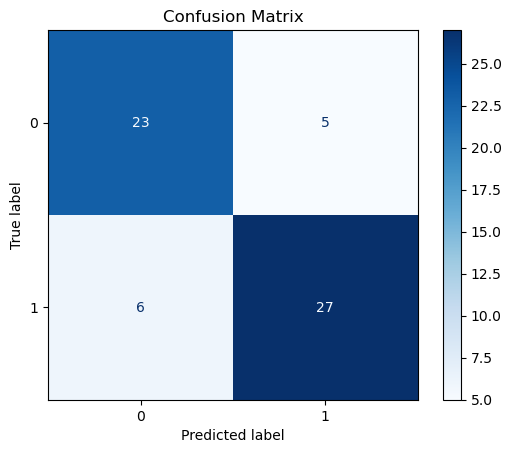

In [43]:
cm = confusion_matrix(y_test, x_test_pre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


## Building a predictive system

In [44]:
input_data = (67,1,0,160,286,0,0,108,1,1.5,1,3,2)

# Change the iput data to a numpy array
input_arr = np.asarray(input_data)

# Reshape the numpy array as we are predicting only one instance
input_reshape = input_arr.reshape(1, -1)

prediction = model.predict(input_reshape)

if prediction[0] == 1:
    print('Person does not have Heart Disease')
else:
    print('Person has Heart Disease')
print('-------------------------------------------------------------------------------')

Person has Heart Disease
-------------------------------------------------------------------------------


C:\Users\sanjay kumar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### **Conclusion:**

> The logistic regression model has analyzed the given input features — such as age, sex, chest pain type, cholesterol levels, fasting blood sugar, resting ECG results, maximum heart rate, etc. — and has predicted that **the person has heart disease**.

Logistic regression provides a binary output (0 or 1), where:

* **0** typically represents the presence of heart disease,
* **1** represents the absence of heart disease.

In this case, since the prediction was `0`, the model classifies the individual as **likely to have heart disease** based on the input medical parameters.

Would you like help interpreting the significance of the individual input features or how they may have influenced the prediction?
